In [7]:
%matplotlib inline
import torch 
import torchvision
from torch import nn
from d2l import torch as d2l

In [13]:
import requests
import os

# Get the current working directory
current_dir = os.getcwd()

# Define the path to the root of the repository
# Assuming that the current directory is "Computer vision"
repo_root = os.path.abspath(os.path.join(current_dir, ".."))

# Path to the img folder at the repository root
img_folder = os.path.join(repo_root, "img")

# Ensure the img folder exists at the repository root
os.makedirs(img_folder, exist_ok=True)

# URL of the image in the GitHub repository
url = "https://github.com/d2l-ai/d2l-en/raw/master/img/cat1.jpg"
# Full path to save the image as cat1.jpg in the img folder
img_path = os.path.join(img_folder, "cat1.jpg")

# Download the image and save it
response = requests.get(url)
if response.status_code == 200:
    with open(img_path, 'wb') as f:
        f.write(response.content)
    print(f"Image saved at {img_path}")
else:
    print("Failed to download the image")


Image saved at c:\Users\alexa\Documents\Uni\Personal Projects\Dive-into-Deep-Learning\img\cat1.jpg


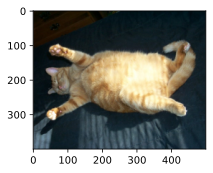

In [14]:
d2l.set_figsize()
img = d2l.Image.open('../img/cat1.jpg')
d2l.plt.imshow(img)

In [15]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

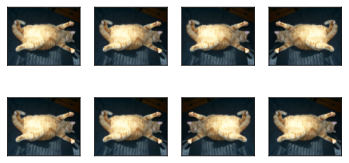

In [16]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

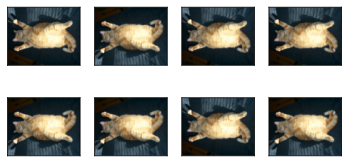

In [17]:
apply(img, torchvision.transforms.RandomVerticalFlip())

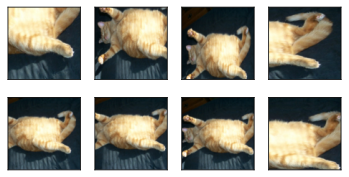

In [18]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

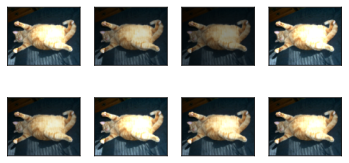

In [19]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

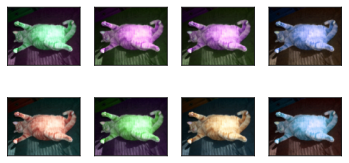

In [20]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

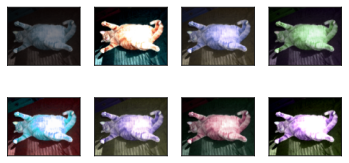

In [21]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

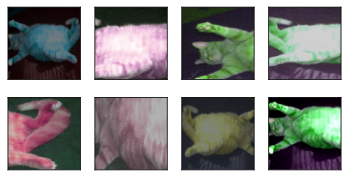

In [22]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

In [23]:
all_images = torchvision.datasets.CIFAR10(train=True, root="../data",
                                          download=True)
d2l.show_images([all_images[i][0] for i in range(32)], 4, 8, scale=0.8);

44.2%


KeyboardInterrupt: 

In [ ]:
train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor()])

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()])

Now just the training part which I'll skip because of long training time it'll take